In [1]:
import pandas as pd

#Cargar el dataset referente a Clash Royale
df = pd.read_csv('clash_wiki_dataset.csv')

#Exploracion inicial
print("Forma del dataset: ", df.shape)
print("Columnas: ", df.columns.tolist())
print("Tipos de datos: ", df.dtypes)
print("Primeras filas: \n", df.head())

Forma del dataset:  (70, 21)
Columnas:  ['Card', 'Card Level (Spawn Level)', 'Cost', 'Count', 'Crown Tower Damage', 'Damage', 'Damage per second', 'Death Damage', 'Health (+Shield)', 'Hit Speed', 'Level', 'Maximum Spawned', 'Radius', 'Range', 'Spawn DPS', 'Spawn Damage', 'Spawn Health', 'Spawn Speed', 'Spawner Health', 'Troop Spawned', 'Type']
Tipos de datos:  Card                         object
Card Level (Spawn Level)     object
Cost                        float64
Count                        object
Crown Tower Damage          float64
Damage                       object
Damage per second            object
Death Damage                float64
Health (+Shield)             object
Hit Speed                    object
Level                       float64
Maximum Spawned             float64
Radius                      float64
Range                        object
Spawn DPS                   float64
Spawn Damage                float64
Spawn Health                float64
Spawn Speed              

In [2]:
import numpy as np

# Copia para limpieza
df_clean = df.copy()

# Convertir columnas numéricas que puedan estar como texto
cols_to_numeric = [
    'Damage', 'Damage per second', 'Health (+Shield)', 'Hit Speed', 'Count',
    'Range', 'Spawner Health'
]
for col in cols_to_numeric:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col].astype(str).str.replace(',', ''), errors='coerce')

for col in cols_to_numeric:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Elimina columnas con más del 80% de valores nulos
umbral = 0.8
df_clean = df_clean.loc[:, df_clean.isnull().mean() < umbral]

# Para las columnas numéricas restantes
for col in df_clean.select_dtypes(include=['float64', 'int64']).columns:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Para las columnas categóricas restantes
for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

# Revisar valores faltantes
print("Valores faltantes por columna:\n", df_clean.isnull().sum())



Valores faltantes por columna:
 Card                 0
Cost                 0
Count                0
Damage               0
Damage per second    0
Death Damage         0
Health (+Shield)     0
Hit Speed            0
Level                0
Range                0
Spawner Health       0
Type                 0
dtype: int64


In [3]:
# Estadísticas descriptivas para columnas numéricas
print(df_clean.describe().T)

# Conteo de valores para columnas categóricas
print(df_clean['Type'].value_counts())
print(df_clean['Count'].value_counts(dropna=False))

                   count         mean         std   min      25%     50%  \
Cost                70.0     4.128571    1.578124   1.0    3.000    4.00   
Count               70.0     1.671429    1.878339   1.0    1.000    1.00   
Damage              70.0   238.200000  242.489360  26.0  111.250  176.00   
Damage per second   70.0   119.228571   69.707291   0.0   84.000  110.50   
Death Damage        70.0    23.014286  122.032722   0.0    0.000    0.00   
Health (+Shield)    70.0  1001.257143  807.251746  67.0  607.500  864.00   
Hit Speed           70.0     1.445000    0.859017   0.0    1.025    1.35   
Level               70.0     5.814286    2.865552   1.0    4.000    7.00   
Range               70.0     2.521429    2.562884   0.0    0.000    2.00   
Spawner Health      70.0   742.028571  207.414587   0.0  739.000  739.00   

                        75%     max  
Cost                  5.000     9.0  
Count                 1.000    14.0  
Damage              242.250  1300.0  
Damage per 

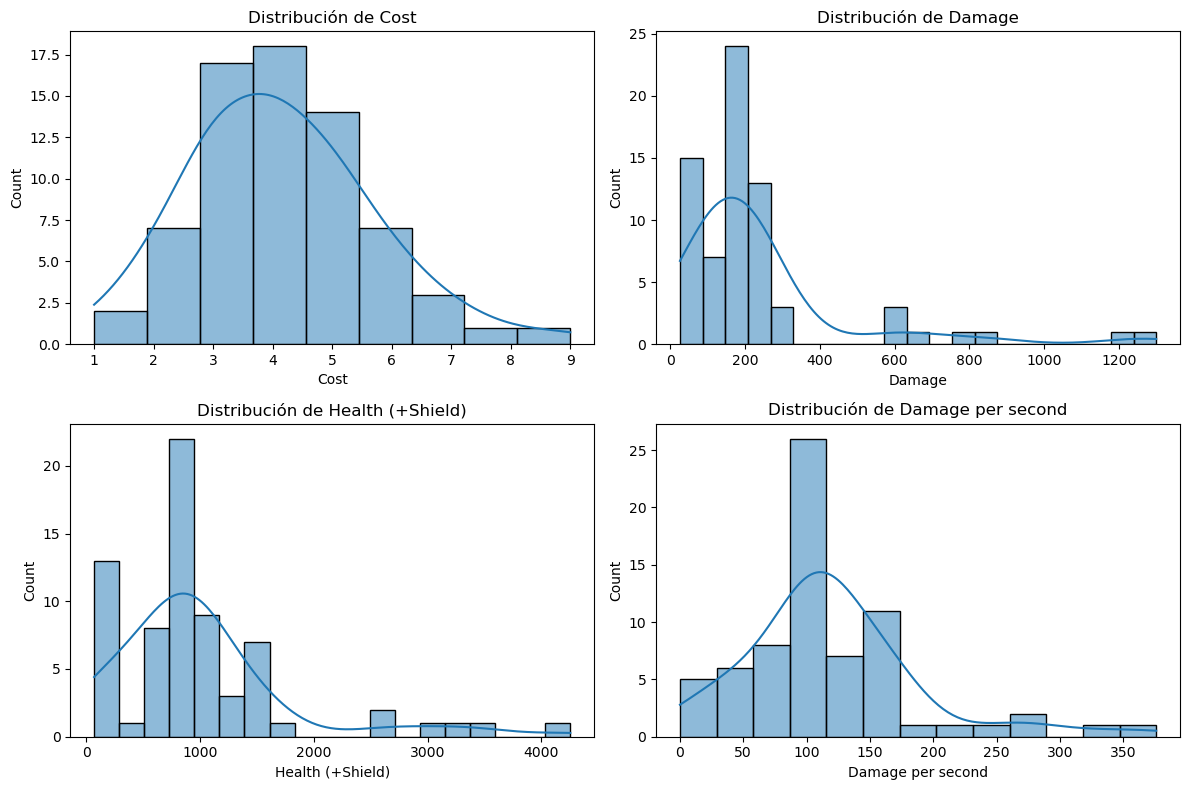

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["Cost", "Damage", "Health (+Shield)", "Damage per second"]
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for ax, col in zip(axs.flat, num_cols):
    sns.histplot(df_clean[col].dropna(), ax=ax, kde=True, color="C0")
    ax.set_title(f"Distribución de {col}")
plt.tight_layout()
plt.show()

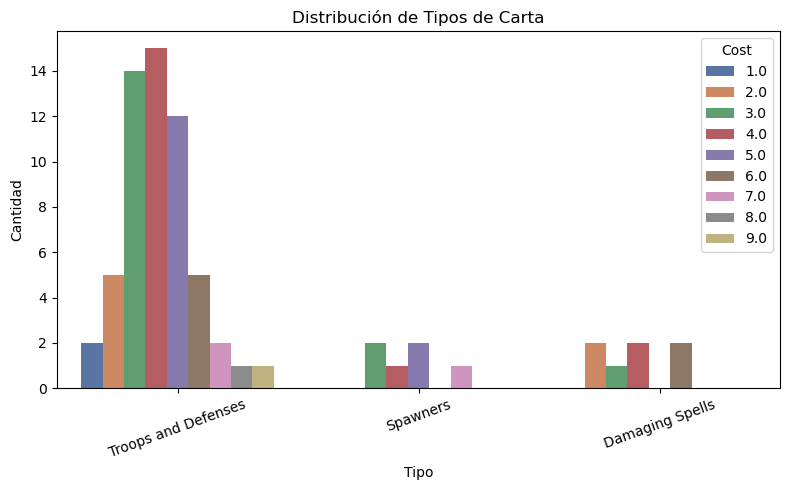

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x="Type", palette="deep", hue="Cost")
plt.title("Distribución de Tipos de Carta")
plt.xlabel("Tipo")
plt.ylabel("Cantidad")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

C:\Users\briam\AppData\Local\Temp\ipykernel_9564\2001930067.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_tropas, x="Card", y="Count", palette="deep")


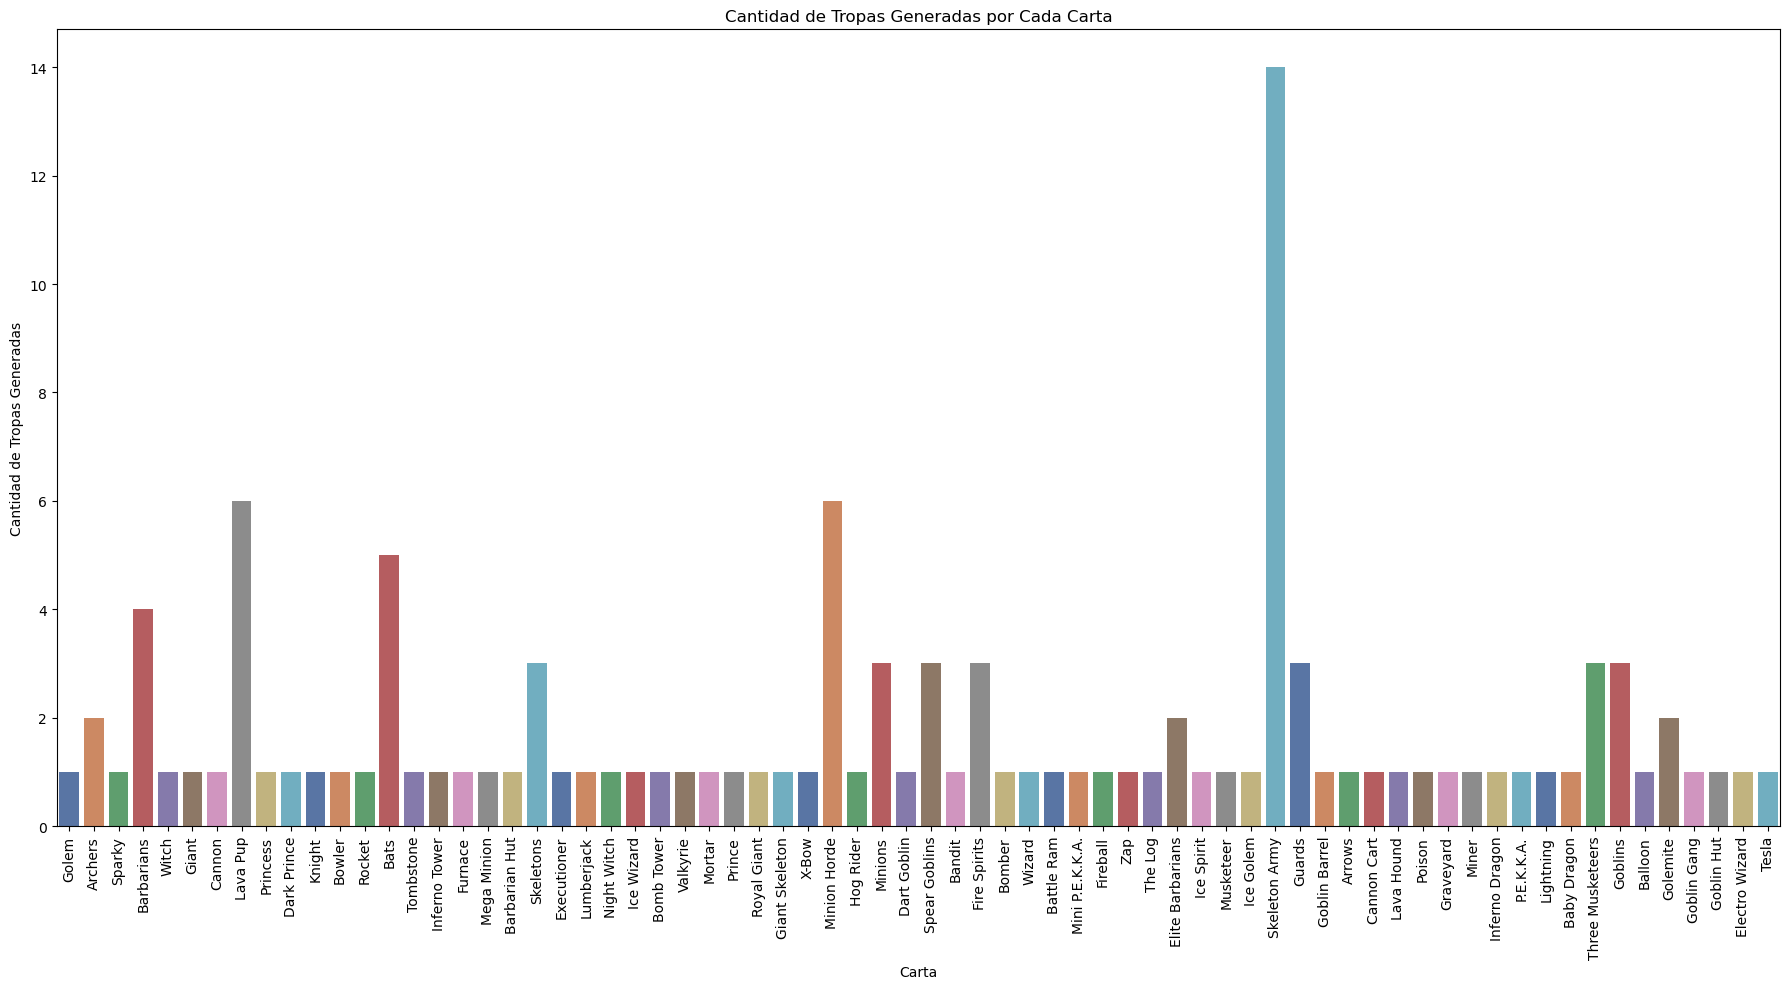

In [6]:
# Filtra solo las cartas que tienen un valor en la columna 'Count'
df_tropas = df_clean[~df_clean["Count"].isna()]

# Baraja aleatoriamente las filas
df_tropas = df_tropas.sample(frac=1, random_state=42) 

plt.figure(figsize=(18, 10))
sns.barplot(data=df_tropas, x="Card", y="Count", palette="deep")
plt.title("Cantidad de Tropas Generadas por Cada Carta")
plt.xlabel("Carta")
plt.ylabel("Cantidad de Tropas Generadas")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

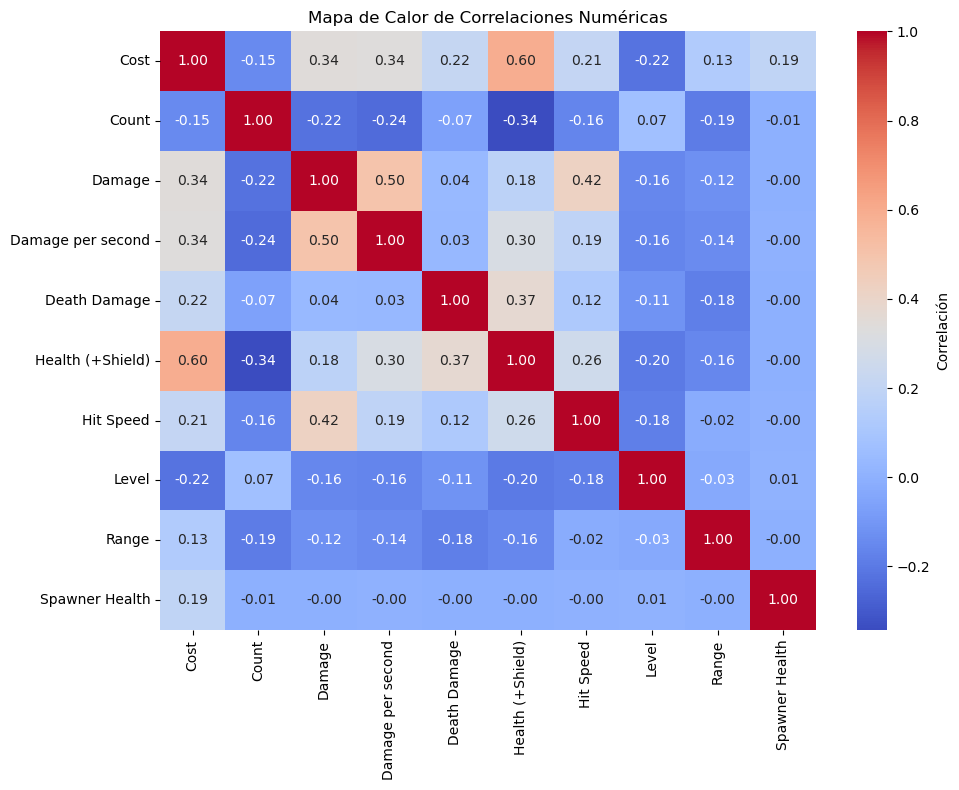

In [7]:
#Matriz de correlación
corr = df_clean.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Correlación"})
plt.title("Mapa de Calor de Correlaciones Numéricas")
plt.tight_layout()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

#Particion de datos
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
print("Tamaño train:", df_train.shape)
print("Tamaño test:", df_test.shape)

# Guarda los conjuntos si lo necesitas
df_train.to_csv('clash_train.csv', index=False)
df_test.to_csv('clash_test.csv', index=False)
df_clean.to_csv('clash_dataset_cleaned.csv', index=False)

Tamaño train: (56, 21)
Tamaño test: (14, 21)
